<a href="https://colab.research.google.com/github/sckgn/FinalYearProject_ML/blob/main/GridSearchCVFemale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
asd_2018_df = pd.read_csv('dataset_2018.csv')

In [3]:
asd_2018_df.rename(columns={'Class/ASD Traits ':'ASD_Traits'}, inplace=True)

In [4]:
grid_fem = asd_2018_df[asd_2018_df['Sex']=='f']

In [5]:
grid_fem = grid_fem.drop(['Case_No', 'Qchat-10-Score','Who completed the test','Ethnicity','Sex'], axis=1)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [7]:
X_grid = grid_fem.drop("ASD_Traits", axis=1)
y_grid = grid_fem["ASD_Traits"]

X_grid_train, X_grid_test, y_grid_train, y_grid_test = train_test_split(X_grid, y_grid, test_size=0.3, random_state=42, stratify=y_grid)


In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

encoder = OrdinalEncoder()
y_encoder = LabelEncoder()
scaler = MinMaxScaler()

age = ['Age_Mons']
char_vals = ['Jaundice','Family_mem_with_ASD']
target = ['ASD_Traits']

In [9]:
def preprocessing(X_train, y_train, X_test, y_test):
  X_train[age] = scaler.fit_transform(X_train[age].values.reshape(-1,1))
  X_test[age] = scaler.transform(X_test[age].values.reshape(-1,1))
  for c in char_vals:
    X_train[c] = encoder.fit_transform(X_train[c].values.reshape(-1,1))
    X_test[c] = encoder.transform(X_test[c].values.reshape(-1,1))
  y_train = y_encoder.fit_transform(y_train.values.ravel())
  y_test = y_encoder.transform(y_test.values.ravel())

In [10]:
  X_grid_train[age] = scaler.fit_transform(X_grid_train[age].values.reshape(-1,1))
  X_grid_test[age] = scaler.transform(X_grid_test[age].values.reshape(-1,1))
  for c in char_vals:
    X_grid_train[c] = encoder.fit_transform(X_grid_train[c].values.reshape(-1,1))
    X_grid_test[c] = encoder.transform(X_grid_test[c].values.reshape(-1,1))
  y_grid_train = y_encoder.fit_transform(y_grid_train.values.ravel())
  y_grid_test = y_encoder.transform(y_grid_test.values.ravel())

In [11]:
print(y_grid_test)

[1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0
 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1
 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0]


##**Logistic Regression**

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)

In [13]:
param_grid = {
    'C'       : np.logspace(-3,3,7),
}

In [14]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [15]:
metrics ={'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score, average='binary', pos_label=1),
          'recall': make_scorer(recall_score,average='binary',pos_label=1),
          'f1_score': make_scorer(f1_score,average='binary',pos_label=1)}

In [16]:
from sklearn.model_selection import GridSearchCV

log_grid = GridSearchCV(log_reg, param_grid=param_grid, cv=5, scoring = metrics, refit='accuracy')

In [17]:
log_grid.fit(X_grid_train, y_grid_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=binary, pos_label=1),
                      'precision': make_scorer(precision_score, average=binary, pos_label=1),
                      'recall': make_scorer(recall_score, average=binary, pos_label=1)})

In [18]:
def show_grid_cv_results(model):
  accuracy = model.cv_results_['mean_test_accuracy']
  precision = model.cv_results_['mean_test_precision']
  recall = model.cv_results_['mean_test_recall']
  f1 = model.cv_results_['mean_test_f1_score']

  print("Best parameters: {}".format(model.best_params_))
  print("Best score: {:.2f}".format(model.best_score_))
  print("Accuracy: ", accuracy.mean())
  print("Precision: ", precision.mean())
  print("Recall: ", recall.mean())
  print("F1 Score: ", f1.mean())

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

def final_evaluation(model, predictors, target):
  predictions = model.predict(predictors)
  print("Accuracy: ", accuracy_score(target, predictions))
  print("Precision[YES]: ", precision_score(target, predictions, average='binary', pos_label=1))
  print("Recall[YES]: ", recall_score(target, predictions,average='binary', pos_label=1))
  print("F1[YES]: ", f1_score(target, predictions,average='binary', pos_label=1))

  ConfusionMatrixDisplay.from_estimator(model, predictors, target)

In [20]:
show_grid_cv_results(log_grid)

Best parameters: {'C': 1000.0}
Best score: 0.99
Accuracy:  0.917878787878788
Precision:  0.9124866332584878
Recall:  0.9936507936507937
F1 Score:  0.9450613869392528


In [21]:
best_est = log_grid.best_estimator_

Accuracy:  1.0
Precision[YES]:  1.0
Recall[YES]:  1.0
F1[YES]:  1.0


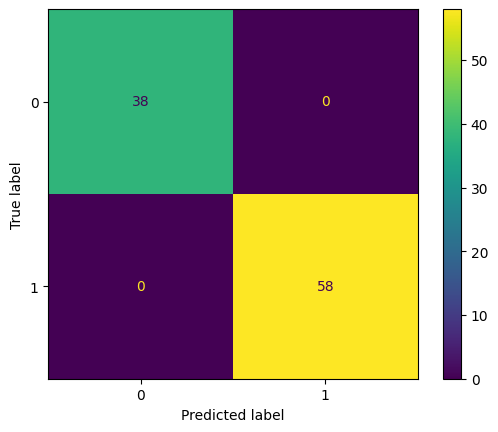

In [22]:
final_evaluation(log_grid,X_grid_test, y_grid_test)

### **Feature importance**

In [23]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

LogisticRegression()

**Chi squared**

In [35]:
best = SelectKBest(chi2, k='all')

X_train_best = best.fit_transform(X_grid_train,y_grid_train)
X_test_best = best.transform(X_grid_test)

bestLR = LogisticRegression()
bestLR.fit(X_train_best,y_grid_train)

LogisticRegression()

In [24]:
# Get the chi2 scores and names for each feature
chi2_scores = best.scores_
feature_names = np.array(X_grid_train.columns)
selected_mask = best.get_support()

sorted_indices = chi2_scores.argsort()[::-1]
sorted_scores = chi2_scores[sorted_indices]
sorted_features = feature_names[selected_mask][sorted_indices]

# Print the feature names and their corresponding chi2 scores
for feature, score in zip(sorted_features, sorted_scores):
    print(f"{feature}: {score:.3f}")

A4: 49.426
A6: 48.695
A9: 47.730
A1: 47.417
A5: 39.984
A3: 38.899
A7: 36.755
A2: 29.501
A8: 24.381
A10: 4.053
Family_mem_with_ASD: 1.319
Age_Mons: 1.124
Jaundice: 0.036


**Information gain**

In [36]:
best_info = SelectKBest(mutual_info_classif, k='all')

X_info_selected = best_info.fit_transform(X_grid_train,y_grid_train) 


In [38]:
info_scores = best_info.scores_

info_mask = best_info.get_support()

sorted_indices_info = info_scores.argsort()[::-1]
sorted_scores_info = info_scores[sorted_indices_info]
sorted_feat_info = feature_names[info_mask][sorted_indices_info]

for feature, score in zip(sorted_feat_info,sorted_scores_info):
  print(f"{feature}: {score:.3f}")

A1: 0.326
A5: 0.269
A6: 0.251
A4: 0.234
A9: 0.218
A7: 0.207
A3: 0.180
A8: 0.133
Family_mem_with_ASD: 0.072
A2: 0.070
Jaundice: 0.034
A10: 0.020
Age_Mons: 0.003


**Feature Coefficients**

In [34]:
coefs = best_est.coef_
sorted_importance = sorted(zip(coefs[0], feature_names), reverse=True)

print("{:<20} {:<10}".format('Feature', 'Importance'))
print("----------------------------------------")
for coef, feat in sorted_importance:
    print("{:<20} {:.4f}".format(feat, abs(coef)))


Feature              Importance
----------------------------------------
A4                   11.1442
A1                   10.6924
A6                   9.8949
A9                   9.6401
A8                   9.1792
A2                   9.0550
A10                  8.7933
A5                   8.5406
A7                   8.1778
A3                   6.6090
Family_mem_with_ASD  3.3605
Age_Mons             3.1499
Jaundice             1.4116


##**SVM**

In [26]:
from sklearn.svm import SVC

In [27]:
svc = SVC(random_state=42)

In [28]:
svc_param_grid = {
    'C': [0.1,1, 10, 100],
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [29]:
svc_grid = GridSearchCV(svc, param_grid = svc_param_grid, cv=5, scoring=metrics,refit='accuracy')

In [30]:
svc_grid.fit(X_grid_train, y_grid_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=binary, pos_label=1),
                      'precision': make_scorer(precision_score, average=binary, pos_label=1),
                      'recall': make_scorer(recall_score, average=binary, pos_label=1)})

In [31]:
show_grid_cv_results(svc_grid)

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best score: 0.99
Accuracy:  0.8144234006734007
Precision:  0.8241711162146741
Recall:  0.9572916666666668
F1 Score:  0.8742423967040338


In [32]:
svc_grid.best_estimator_.kernel

'rbf'